* 장점
    * 예측 속도가 상당히 빠르며, 예측력 또한 좋다.
    * 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보인다.
* 단점
    * 복잡한 모델인 만큼, 해석에 어려움이 있다.
    * 더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다롭다.

* 종속변수가 연속형 데이터인 경우든 범주형 데이터인 경우든 모두 사용할 수 있다.
* 이미지나 자연어가 아닌 표로 정리된 데이터의 경우, 거의 모든 상황에 활용할 수  있다.


## 10.1 문제 정의 : 한눈에 보는 예측 목표

* 미션: 스피드데이팅 데이터셋을 이용해서 커플 성사 여부를 예측하라
* 알고리즘 : XG부스트(XGBoost)
* 문제 유형: 분류
* 평가 지표: 정확도, 혼동 행렬, 분류 리포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
pd.options.display.max_columns=40

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [5]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [6]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

In [7]:
# 결측치 제거
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests','attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

In [8]:
data = data.fillna(-99) # 남은 결측치는 -99로 대체

## 10.3 전처리 : 피처 엔지니어링

In [9]:
def age_gap(x):
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        x['age'] - x['age_o']

In [10]:
data['age_gap'] = data.apply(age_gap, axis=1)

In [11]:
data['age_gap_abs'] = abs(data['age_gap'])

In [12]:
def same_race(x):
    if x['race'] == -99:
        return -99
    elif x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else:
        return -1

In [13]:
data['same_race'] = data.apply(same_race, axis=1)

In [14]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [15]:
data['same_race_point'] = data.apply(same_race_point, axis=1)

In [16]:
def rating(data, importance, score):
    if data[importance] == -99:
        return -99
    elif data[score] == -99:
        return -99
    else:
        return data[importance] * data[score]

In [17]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [18]:
partner_imp = data.columns[8:14] # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26] # 본인의 중요도
my_rate_partner = data.columns[26:32] # 상대방에 대한 본인의 평가

In [19]:
# 상대방 관련 새 변수 이름 리스트
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']
# 본인 관련 새 변수 이름 리스트
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

In [20]:
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)


In [21]:
for i, j, k in zip(new_label_me, my_imp, my_rate_partner):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [22]:
data = pd.get_dummies(data, columns=['gender', 'race', 'race_o'], drop_first=True)

## 10.5 모델링 및 평가

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1),  data['match'], test_size=0.2, random_state=100)

In [24]:
import xgboost as xgb

/Users/hansanghui/opt/anaconda3/envs/myenv1/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [25]:
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100, use_label_encoder=False)

In [26]:
model.fit(X_train, y_train)

/Users/hansanghui/opt/anaconda3/envs/myenv1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:31:21] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [27]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8653136531365314

In [28]:
print(confusion_matrix(y_test, pred))

[[1292   73]
 [ 146  115]]


In [29]:
data['match'].value_counts()

0    6790
1    1340
Name: match, dtype: int64

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.61      0.44      0.51       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.72      1626
weighted avg       0.85      0.87      0.86      1626



* 정밀도(precision)  
$TP \over TP + FP$  
1종 오류와 관련, 실제로 1로 예측한 경우, 얼마만큼이 실제로 1인지를 나타냄.

* 재현율(recall)  
$TP \over TP + FN $  
2종 오류와 관련, 실제로 1중에, 얼마만큼 1로 예측을 했는지 나타냄

* F1 score
정밀도와 재현율의 조화 평균  
$2 * (precision * recall) \over (precision + recall)$  

* 경사 하강법

In [31]:
max_depth = [3, 5, 10]
learning_rate = [0.01, 0.05, 0.1]

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth' : [5, 7, 10],
    'subsample' : [0.5, 0.7, 1],
    'n_estimators': [300, 500, 1000]
}

In [34]:
model = xgb.XGBClassifier()

In [35]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=5)

<!-- gs_model.fit(X_train, y_train) -->

In [41]:
# gs_model.best_params_

In [42]:
# pred = gs_model.predict(X_test)

In [ ]:
# accuracy_score(y_test, pred)

In [ ]:
# print(classification_report(y_test, pred))

## 10.8 중요 변수 확인

In [43]:
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5, random_state=100)

In [44]:
model.fit(X_train, y_train)

/Users/hansanghui/opt/anaconda3/envs/myenv1/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hansanghui/opt/anaconda3/envs/myenv1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:13:53] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
model.feature_importances_

array([0.0100628 , 0.01232549, 0.00912444, 0.01019195, 0.01094785,
       0.01350423, 0.01381248, 0.01573691, 0.01135239, 0.01377819,
       0.01703993, 0.04676888, 0.01436752, 0.01758111, 0.02778915,
       0.01365067, 0.02236081, 0.0160435 , 0.01396238, 0.01612994,
       0.01264793, 0.01414683, 0.01316356, 0.02768657, 0.01535979,
       0.01266819, 0.0298027 , 0.01809027, 0.01769027, 0.01232217,
       0.01013115, 0.0203734 , 0.05285272, 0.02168748, 0.0222656 ,
       0.01077087, 0.01189536, 0.01059534, 0.01485658, 0.01212148,
       0.01304964, 0.01487633, 0.01434289, 0.01113706, 0.00954705,
       0.01192562, 0.01291426, 0.01285523, 0.01193985, 0.0132804 ,
       0.00969376, 0.        , 0.02191566, 0.01024889, 0.04497222,
       0.0333662 , 0.02205783, 0.01300397, 0.02092846, 0.01028584],
      dtype=float32)

In [49]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [50]:
feature_imp.head()

,features,values
0,has_null,0.010063
1,age,0.012325
2,age_o,0.009124
3,importance_same_race,0.010192
4,importance_same_religion,0.010948


<AxesSubplot:xlabel='values', ylabel='features'>

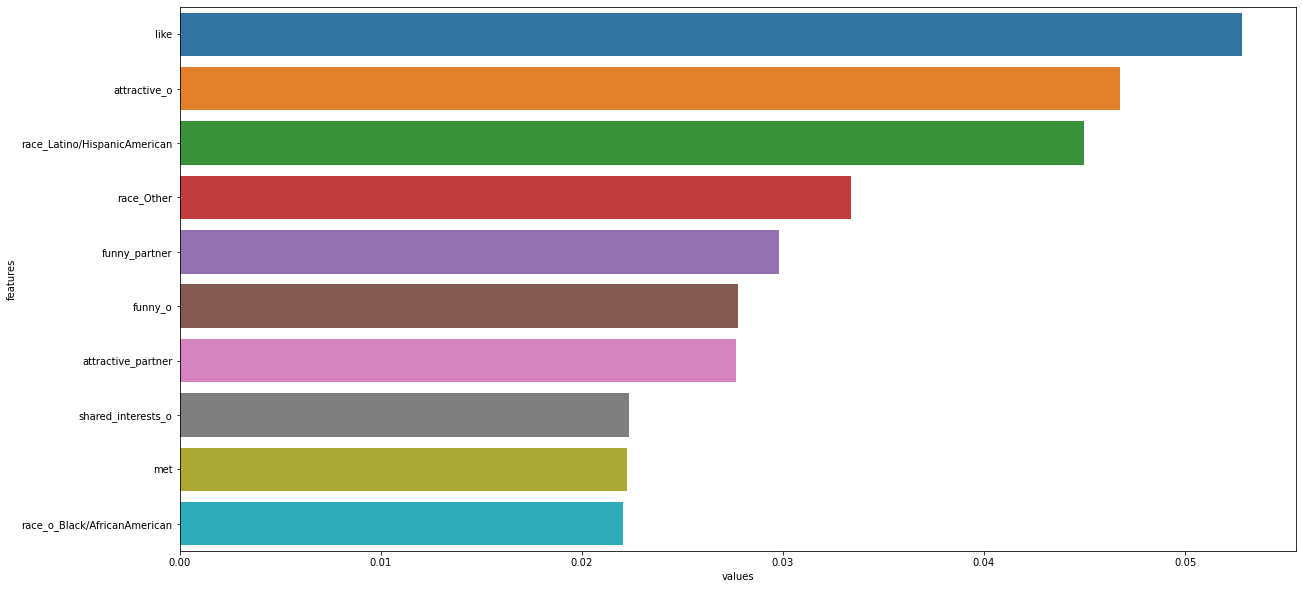

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features', data=feature_imp.sort_values(by='values', ascending=False).head(10))

## 10.9 이해하기 : XGBoost

* 트리모델 진화 과정: 결정 트리 -> 배깅 -> 랜덤 포레스트 -> 부스팅 -> 경사 부스팅 -> XG 부스팅
* 배깅  
  배깅은 부트스트랩(복원추출 허용) 훈련셋을 사용하는 트리 모델. 부트스트랩은 데이터의 일부분을 무작위로 추출하는 방법. 이런식으로 추출한 데이터의 여러 부분집합을 사용해 여러 트리를 만들어 오버피팅을 방지.
* 부스팅과 에이다부스트  
  부스팅은 랜덤 포레스트에서 한 단계 더 발전한 방법으로 역시 여러 트리를 만드는 모델. 가장 큰 차이점은 랜덤 포레스트에서 각 트리는 독립적이나 부스팅에서는 그렇지 않다. 부스팅은 이전 트리의 정보를 활용해 이전 트리와의 시너지를 극대화 하려고 노력한다. 부스팅의 대표적인 알고리즘은 에이다부스트이다. 단계적으로 트리를 만들고 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정 한다.
 * 경사 부스팅과 XGBoost  
   경사 부스팅의 경우는 경사하강법을 이용한다. 이전 모델의 에러를 기반으로 다음 트리를 만들어간다. XGBoosting의 경우 가중치 분위수 스케치, 희소성 인식 하이퍼파라미터 기능을 추가했다.